In [136]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF


# Cargar los datos
# Cargar el archivo Excel
archivo_excel = 'Grupo_5.xlsx'

# Cargar la hoja de Excel en un DataFrame de pandas
df_santa_ana = pd.read_excel(archivo_excel, sheet_name="Santa Ana")
df_la_floresta = pd.read_excel(archivo_excel, sheet_name="La Floresta")

# Añadir columnas para mes y día de la semana
for df in [df_santa_ana, df_la_floresta]:
    df['Mes'] = df['Fecha'].dt.month
    df['DiaSemana'] = df['Fecha'].dt.dayofweek

In [137]:
def calcular_distribucion_empirica(data):
    return ECDF(data)

def calcular_densidad(data, bins=30):
    hist, bin_edges = np.histogram(data, bins=bins, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    return bin_centers, hist

def calcular_intervalo_confianza(data, confianza):
    return stats.t.interval(confianza, len(data)-1, loc=np.mean(data), scale=stats.sem(data))

def analisis_por_grupo(df, grupo):
    resultados = {}
    for nombre, grupo_data in df.groupby(grupo):
        ecdf = calcular_distribucion_empirica(grupo_data['Ventas'])
        densidad = calcular_densidad(grupo_data['Ventas'])
        ic_95 = calcular_intervalo_confianza(grupo_data['Ventas'], 0.95)
        ic_99 = calcular_intervalo_confianza(grupo_data['Ventas'], 0.99)
        resultados[nombre] = {
            'ecdf': ecdf,
            'densidad': densidad,
            'ic_95': ic_95,
            'ic_99': ic_99
        }
    return resultados

In [138]:
# Análisis por mes
santa_ana_mes = analisis_por_grupo(df_santa_ana, 'Mes')
la_floresta_mes = analisis_por_grupo(df_la_floresta, 'Mes')

# Análisis por día de la semana
santa_ana_dia = analisis_por_grupo(df_santa_ana, 'DiaSemana')
la_floresta_dia = analisis_por_grupo(df_la_floresta, 'DiaSemana')

# Prueba de hipótesis para comparar las ventas de ambas tiendas
t_stat, p_value = stats.ttest_ind(df_santa_ana['Ventas'],df_la_floresta['Ventas'])

Gráfico para el análisis de las ventas por mes

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

def graficar_analisis_mensual(datos_santa_ana, datos_la_floresta):
    fig, axs = plt.subplots(2, 2, figsize=(20, 20))
    fig.suptitle('Análisis de Ventas Mensuales', fontsize=16)

    # Distribución empírica
    for mes in range(1, 13):
        axs[0, 0].step(datos_santa_ana[mes]['ecdf'].x, datos_santa_ana[mes]['ecdf'].y, 
                       label=f'Santa Ana - {calendar.month_abbr[mes]}')
        axs[0, 1].step(datos_la_floresta[mes]['ecdf'].x, datos_la_floresta[mes]['ecdf'].y, 
                       label=f'La Floresta - {calendar.month_abbr[mes]}')
    
    axs[0, 0].set_title('Distribución Empírica - Santa Ana')
    axs[0, 1].set_title('Distribución Empírica - La Floresta')
    axs[0, 0].legend(loc='lower right', fontsize='x-small')
    axs[0, 1].legend(loc='lower right', fontsize='x-small')

    # Función de densidad
    for mes in range(1, 13):
        axs[1, 0].plot(datos_santa_ana[mes]['densidad'][0], datos_santa_ana[mes]['densidad'][1], 
                       label=f'Santa Ana - {calendar.month_abbr[mes]}')
        axs[1, 1].plot(datos_la_floresta[mes]['densidad'][0], datos_la_floresta[mes]['densidad'][1], 
                       label=f'La Floresta - {calendar.month_abbr[mes]}')
    
    axs[1, 0].set_title('Función de Densidad - Santa Ana')
    axs[1, 1].set_title('Función de Densidad - La Floresta')
    axs[1, 0].legend(loc='upper right', fontsize='x-small')
    axs[1, 1].legend(loc='upper right', fontsize='x-small')

    plt.tight_layout()
    plt.savefig('analisis_mensual.png')
    plt.close()

# Llamar a la función
graficar_analisis_mensual(santa_ana_mes, la_floresta_mes)

![Gráfico de datos](analisis_mensual.png)

Gráficos para la comparación de tiendas

In [140]:
def graficar_analisis_semanal(datos_santa_ana, datos_la_floresta):
    dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
    fig, axs = plt.subplots(2, 2, figsize=(20, 20))
    fig.suptitle('Análisis de Ventas por Día de la Semana', fontsize=16)

    # Distribución empírica
    for dia in range(7):
        axs[0, 0].step(datos_santa_ana[dia]['ecdf'].x, datos_santa_ana[dia]['ecdf'].y, 
                       label=f'Santa Ana - {dias[dia]}')
        axs[0, 1].step(datos_la_floresta[dia]['ecdf'].x, datos_la_floresta[dia]['ecdf'].y, 
                       label=f'La Floresta - {dias[dia]}')
    
    axs[0, 0].set_title('Distribución Empírica - Santa Ana')
    axs[0, 1].set_title('Distribución Empírica - La Floresta')
    axs[0, 0].legend(loc='lower right', fontsize='x-small')
    axs[0, 1].legend(loc='lower right', fontsize='x-small')

    # Función de densidad
    for dia in range(7):
        axs[1, 0].plot(datos_santa_ana[dia]['densidad'][0], datos_santa_ana[dia]['densidad'][1], 
                       label=f'Santa Ana - {dias[dia]}')
        axs[1, 1].plot(datos_la_floresta[dia]['densidad'][0], datos_la_floresta[dia]['densidad'][1], 
                       label=f'La Floresta - {dias[dia]}')
    
    axs[1, 0].set_title('Función de Densidad - Santa Ana')
    axs[1, 1].set_title('Función de Densidad - La Floresta')
    axs[1, 0].legend(loc='upper right', fontsize='x-small')
    axs[1, 1].legend(loc='upper right', fontsize='x-small')

    plt.tight_layout()
    plt.savefig('analisis_semanal.png')
    plt.close()

# Llamar a la función
graficar_analisis_semanal(santa_ana_dia, la_floresta_dia)

![Gráfico de datos](analisis_semanal.png)

Gráfica para comparar tiendas

In [141]:
def graficar_comparacion_tiendas(santa_ana, la_floresta):
    fig, axs = plt.subplots(2, 1, figsize=(15, 15))
    fig.suptitle('Comparación de Ventas entre Tiendas', fontsize=16)

    # Boxplot
    data = [santa_ana['Ventas'], la_floresta['Ventas']]
    axs[0].boxplot(data, labels=['Santa Ana', 'La Floresta'])
    axs[0].set_title('Distribución de Ventas')
    axs[0].set_ylabel('Ventas ($)')

    # Histograma
    axs[1].hist(santa_ana['Ventas'], bins=30, alpha=0.5, label='Santa Ana')
    axs[1].hist(la_floresta['Ventas'], bins=30, alpha=0.5, label='La Floresta')
    axs[1].set_title('Histograma de Ventas')
    axs[1].set_xlabel('Ventas ($)')
    axs[1].set_ylabel('Frecuencia')
    axs[1].legend()

    plt.tight_layout()
    plt.savefig('comparacion_tiendas.png')
    plt.close()

# Llamar a la función
graficar_comparacion_tiendas(df_santa_ana, df_la_floresta)

![Gráfico de comparación de tiendas](comparacion_tiendas.png)

Gráficos de intervalos de confianza

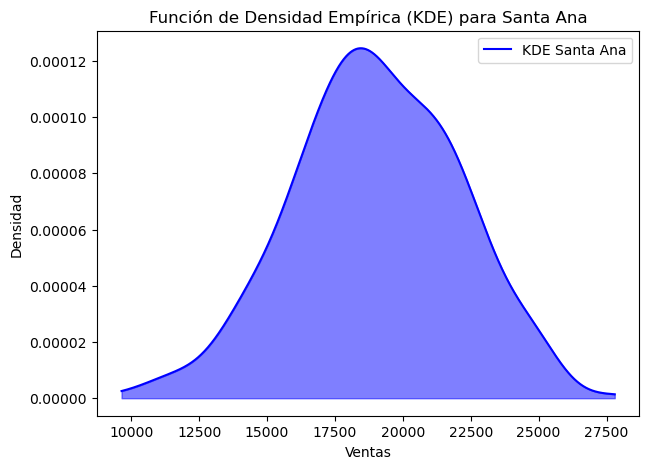

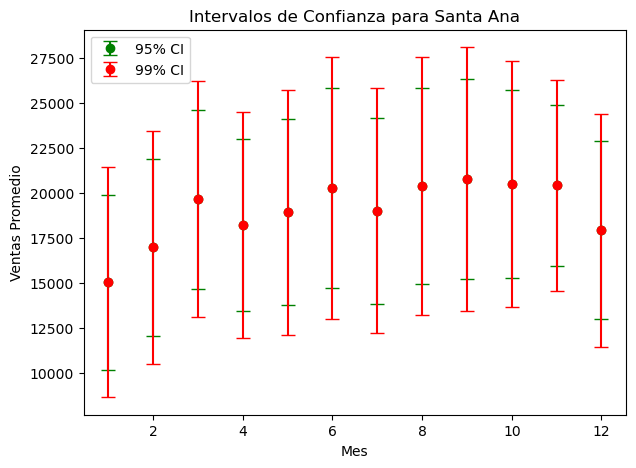

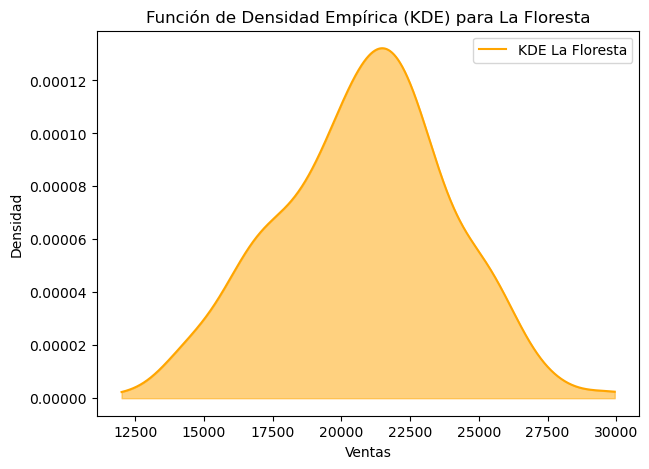

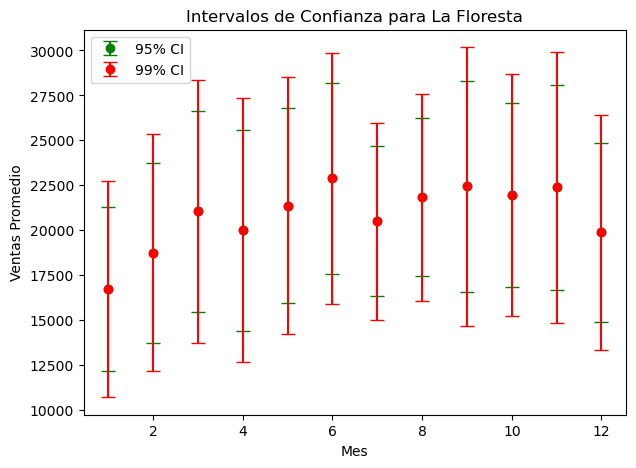

In [143]:
from scipy.stats import gaussian_kde, norm
# Agrupar por mes y calcular estadísticas para Santa Ana
santa_ana_monthly = df_santa_ana.groupby(df_santa_ana['Fecha'].dt.month)['Ventas'].agg(['mean', 'std'])

# Función de densidad empírica usando KDE para Santa Ana
kde_santa_ana = gaussian_kde(df_santa_ana['Ventas']) # type: ignore

# Intervalos de confianza empíricos para Santa Ana
conf_int_95_santa_ana = norm.interval(0.95, loc=santa_ana_monthly['mean'], scale=santa_ana_monthly['std'])
conf_int_99_santa_ana = norm.interval(0.99, loc=santa_ana_monthly['mean'], scale=santa_ana_monthly['std'])

# Repetir para La Floresta de manera similar
# Agrupar por mes y calcular estadísticas para La Floresta
la_floresta_monthly = df_la_floresta.groupby(df_la_floresta['Fecha'].dt.month)['Ventas'].agg(['mean', 'std'])

# Función de densidad empírica usando KDE para La Floresta
kde_la_floresta = gaussian_kde(df_la_floresta['Ventas'])

# Intervalos de confianza empíricos para La Floresta
conf_int_95_la_floresta = norm.interval(0.95, loc=la_floresta_monthly['mean'], scale=la_floresta_monthly['std'])
conf_int_99_la_floresta = norm.interval(0.99, loc=la_floresta_monthly['mean'], scale=la_floresta_monthly['std'])

# Visualización de resultados y conclusiones en el informe final

# Gráfica de densidad empírica para Santa Ana
plt.figure(figsize=(7, 5))
x_santa_ana = np.linspace(min(df_santa_ana['Ventas']), max(df_santa_ana['Ventas']), 1000)
plt.plot(x_santa_ana, kde_santa_ana(x_santa_ana), label='KDE Santa Ana', color='blue')
plt.fill_between(x_santa_ana, kde_santa_ana(x_santa_ana), alpha=0.5, color='blue')
plt.title('Función de Densidad Empírica (KDE) para Santa Ana')
plt.xlabel('Ventas')
plt.ylabel('Densidad')
plt.legend()
plt.show()

# Gráfica de intervalos de confianza para Santa Ana
plt.figure(figsize=(7, 5))
plt.errorbar(santa_ana_monthly.index, santa_ana_monthly['mean'], yerr=[santa_ana_monthly['mean'] - conf_int_95_santa_ana[0], conf_int_95_santa_ana[1] - santa_ana_monthly['mean']], fmt='o', capsize=5, label='95% CI', color='green')
plt.errorbar(santa_ana_monthly.index, santa_ana_monthly['mean'], yerr=[santa_ana_monthly['mean'] - conf_int_99_santa_ana[0], conf_int_99_santa_ana[1] - santa_ana_monthly['mean']], fmt='o', capsize=5, label='99% CI', color='red')
plt.title('Intervalos de Confianza para Santa Ana')
plt.xlabel('Mes')
plt.ylabel('Ventas Promedio')
plt.legend()
plt.show()

# Gráfica de densidad empírica para La Floresta
plt.figure(figsize=(7, 5))
x_la_floresta = np.linspace(min(df_la_floresta['Ventas']), max(df_la_floresta['Ventas']), 1000)
plt.plot(x_la_floresta, kde_la_floresta(x_la_floresta), label='KDE La Floresta', color='orange')
plt.fill_between(x_la_floresta, kde_la_floresta(x_la_floresta), alpha=0.5, color='orange')
plt.title('Función de Densidad Empírica (KDE) para La Floresta')
plt.xlabel('Ventas')
plt.ylabel('Densidad')
plt.legend()
plt.show()

# Gráfica de intervalos de confianza para La Floresta
plt.figure(figsize=(7, 5))
plt.errorbar(la_floresta_monthly.index, la_floresta_monthly['mean'], yerr=[la_floresta_monthly['mean'] - conf_int_95_la_floresta[0], conf_int_95_la_floresta[1] - la_floresta_monthly['mean']], fmt='o', capsize=5, label='95% CI', color='green')
plt.errorbar(la_floresta_monthly.index, la_floresta_monthly['mean'], yerr=[la_floresta_monthly['mean'] - conf_int_99_la_floresta[0], conf_int_99_la_floresta[1] - la_floresta_monthly['mean']], fmt='o', capsize=5, label='99% CI', color='red')
plt.title('Intervalos de Confianza para La Floresta')
plt.xlabel('Mes')
plt.ylabel('Ventas Promedio')
plt.legend()
plt.show()

Mes indicado para tomar vacaciones:
El mes con las ventas promedio más bajas en ambas tiendas es febrero.
Mejor mes para hacer inversiones:
El mes con las ventas promedio más altas en ambas tiendas es diciembre.

Don Francisco, basándonos en el análisis de sus datos de ventas del año pasado, le recomendamos:

- a) Considerar tomar sus vacaciones en febrero, ya que es el mes que muestra las ventas más bajas en promedio para ambas tiendas.
- b) Planificar sus inversiones importantes para diciembre, pues es el mes que presenta las ventas más altas en promedio para ambas tiendas.

Es importante tener en cuenta que estos resultados se basan en los datos del año pasado y que otros factores pueden influir en su decisión final. Le sugerimos considerar también otros aspectos de su negocio y del mercado local al tomar estas decisiones.